<a href="https://colab.research.google.com/github/nklsrmy/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7

Text Generation using LSTM

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt \
    -O /tmp/snowwhite.txt

data = open('/tmp/snowwhite.txt').read()

--2025-05-27 09:07:41--  https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520 (1.5K) [text/plain]
Saving to: ‘/tmp/snowwhite.txt’

/tmp/snowwhite.txt  100%[===================>]   1.48K  --.-KB/s    in 0s      

2025-05-27 09:07:41 (24.5 MB/s) - ‘/tmp/snowwhite.txt’ saved [1520/1520]



In [3]:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Create the LSTM model

1. Build an LSTM

In [4]:
model = Sequential()
model.add(Embedding(total_words, 70, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(500, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dense(128, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), ))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.0343 - loss: 5.1005
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0550 - loss: 4.8793
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0296 - loss: 4.7228
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0618 - loss: 4.6664
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0617 - loss: 4.5640
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0761 - loss: 4.3531
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0970 - loss: 4.3702
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0834 - loss: 4.1778
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1625 - loss: 3.9701
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1311 - loss: 3.7159
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1267 - loss: 3.8139
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1238 - l

In [6]:
print(history.history['accuracy'][-1])

0.9755101799964905


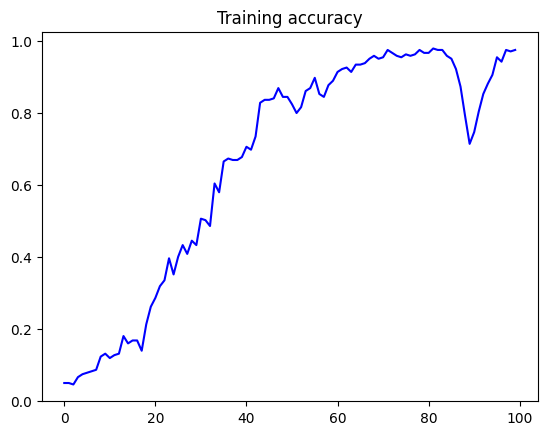

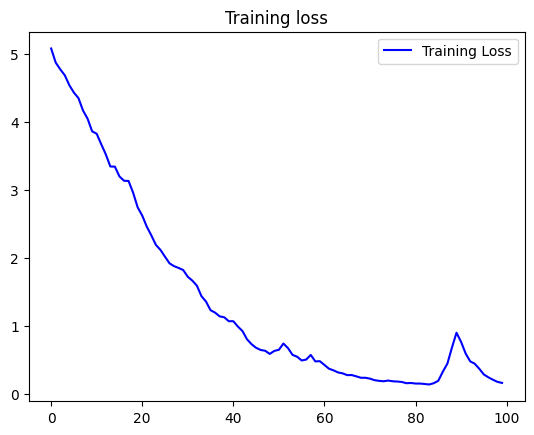

In [7]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## B. Generate texts


2. "Snow White lived in the forest with..."

In [9]:
# put your answer here
def generate_text(seed_text, next_words, max_sequence_len):
    used_indices = set()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        sorted_indices = np.argsort(predictions)[::-1]  # sort by probability descending
        next_index = None

        for index in sorted_indices:
            if index not in used_indices:
                next_index = index
                used_indices.add(index)
                break

        if next_index is None:
            break  # all words used, end early

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                output_word = word
                break

        if output_word == "":
            break  # fail-safe

        seed_text += " " + output_word

    return seed_text

seed_text = "Snow White lived in the forest with"
print(generate_text(seed_text, 50, max_sequence_len))

Snow White lived in the forest with beautiful to put her far away cry plotting but was all white the then spite off innocent little one ran calling would tree it so too very called and sitting spot that came return majesty death is mirror lady alone everyone beside by sure rich at last your not intc


3. "The queen looked into the mirror and said..."

In [10]:
# put your answer here
def generate_text(seed_text, next_words, max_sequence_len):
    used_indices = set()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        sorted_indices = np.argsort(predictions)[::-1]  # sort by probability descending
        next_index = None

        for index in sorted_indices:
            if index not in used_indices:
                next_index = index
                used_indices.add(index)
                break

        if next_index is None:
            break  # all words used, end early

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                output_word = word
                break

        if output_word == "":
            break  # fail-safe

        seed_text += " " + output_word

    return seed_text

seed_text = "The queen looked into the mirror and said"
print(generate_text(seed_text, 50, max_sequence_len))

The queen looked into the mirror and said day whenever castle a rich one off innocent little tree ran fell would at spot last lady to is her then was cry away far the fatal are your put white everyone upon plotting all alone mirror on blue loveliest intc came but beside spite trusty it that majesty return


4. "One day, Snow White found a small cottage and..."

In [11]:
# put your answer here
def generate_text(seed_text, next_words, max_sequence_len):
    used_indices = set()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        sorted_indices = np.argsort(predictions)[::-1]  # sort by probability descending
        next_index = None

        for index in sorted_indices:
            if index not in used_indices:
                next_index = index
                used_indices.add(index)
                break

        if next_index is None:
            break  # all words used, end early

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                output_word = word
                break

        if output_word == "":
            break  # fail-safe

        seed_text += " " + output_word

    return seed_text

seed_text = "One day, Snow White found a small cottage and"
print(generate_text(seed_text, 50, max_sequence_len))

One day, Snow White found a small cottage and when heard it fatal spot innocent little rich off ran one so was to put her then spite sitting cry far away but mirror lady white all on the plotting return that majesty your is everyone upon beside by trusty would spying hair he unseen alone intc came snow in


In [12]:
def generate_text(seed_text, next_words, max_sequence_len):
    used_indices = set()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        sorted_indices = np.argsort(predictions)[::-1]  # sort by probability descending
        next_index = None

        for index in sorted_indices:
            if index not in used_indices:
                next_index = index
                used_indices.add(index)
                break

        if next_index is None:
            break  # all words used, end early

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                output_word = word
                break

        if output_word == "":
            break  # fail-safe

        seed_text += " " + output_word

    return seed_text

seed_text = "Once upon a time"
print(generate_text(seed_text, 50, max_sequence_len))

Once upon a time in a great castle was far her off innocent little one so upon away to cry put mirror on the forest ran spot that majesty return plotting all white is he everyone spite rich trusty calling at last tree it then hair lady alone intc came but beside by made


In [23]:
def generate_text(seed_text, next_words, max_sequence_len):
    used_indices = set()
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        sorted_indices = np.argsort(predictions)[::-1]  # sort by probability descending
        next_index = None

        for index in sorted_indices:
            if index not in used_indices:
                next_index = index
                used_indices.add(index)
                break

        if next_index is None:
            break  # all words used, end early

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                output_word = word
                break

        if output_word == "":
            break  # fail-safe

        seed_text += " " + output_word

    return seed_text

seed_text = "Snow White is"
print(generate_text(seed_text, 2, max_sequence_len))

Snow White is the loveliest
